In [38]:
import pandas as pd
import os

# Получаем путь к текущей директории
current_dir = os.getcwd()

# Добавляем путь к папке с данными
data_dir = os.path.join(current_dir, 'data')

# Загружаем данные по событиям
event = pd.read_csv(os.path.join(data_dir, '7_4_Events.csv'), sep=',')

# Загружаем данные по оплатам
purchase = pd.read_csv(os.path.join(data_dir, '7_4_Purchase.csv'), sep=',')

Проверка гипотез производится на пользователях, которые зарегистрировались в 2018 году (с 1 января по 31 декабря 2018 года включительно).

In [39]:
condition = (event.start_time >= '2018-01-01') & (event.start_time <= '2019-01-01') & (
    event.event_type == 'registration') # условие отбора пользоватедей зарегистрированных в 2018 году

registration_list = event[condition]['user_id'].to_list() # создаем список пользователей на 2018
event_df = event[event['user_id'].isin(registration_list)] # создаем DF с пользователями зарегистрированными в 2018 году 
event_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 66959 entries, 51405 to 118364
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              66959 non-null  int64  
 1   event_type      66959 non-null  object 
 2   selected_level  8342 non-null   object 
 3   start_time      66959 non-null  object 
 4   tutorial_id     32954 non-null  float64
 5   user_id         66959 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.6+ MB


In [40]:
event_df['start_time'] = pd.to_datetime(
    event_df['start_time'], format='%Y-%m-%d %H:%M:%S') # преобразуем формат столбца 'start_time'
event_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66959 entries, 51405 to 118364
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              66959 non-null  int64         
 1   event_type      66959 non-null  object        
 2   selected_level  8342 non-null   object        
 3   start_time      66959 non-null  datetime64[ns]
 4   tutorial_id     32954 non-null  float64       
 5   user_id         66959 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 3.6+ MB


C:\Users\achuk\AppData\Local\Temp\ipykernel_14932\1732206749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_df['start_time'] = pd.to_datetime(


In [41]:
# создаем DF c пользователями зарегистрировавишимя в 2018
purchase_df = purchase[
    purchase['user_id'].isin(registration_list)
    ] 
# добавляем столбец 'event_type' со значениями 'purchase'
purchase_df['event_type'] = 'purchase'  # добавляем столбец 'event_type' со значениями 'purchase'
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 1171 to 2778
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1600 non-null   int64 
 1   user_id         1600 non-null   int64 
 2   event_datetime  1600 non-null   object
 3   amount          1600 non-null   int64 
 4   event_type      1600 non-null   object
dtypes: int64(3), object(2)
memory usage: 75.0+ KB


C:\Users\achuk\AppData\Local\Temp\ipykernel_14932\2716253393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_df['event_type'] = 'purchase'  # добавляем столбец 'event_type' со значениями 'purchase'


In [42]:
# преобразуем формат признака event_datetime
purchase_df.event_datetime =pd.to_datetime(
    purchase_df.event_datetime, format='%Y-%m-%dT%H:%M:%S'
    ) 
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 1171 to 2778
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              1600 non-null   int64         
 1   user_id         1600 non-null   int64         
 2   event_datetime  1600 non-null   datetime64[ns]
 3   amount          1600 non-null   int64         
 4   event_type      1600 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 75.0+ KB


C:\Users\achuk\AppData\Local\Temp\ipykernel_14932\83849184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_df.event_datetime =pd.to_datetime(


In [43]:
total_event_df = pd.concat([event_df, purchase_df], sort=False) # объединяем датафреймы events_df и purchase_df 
total_event_df.head()

,id,event_type,selected_level,start_time,tutorial_id,user_id,event_datetime,amount
51405,80308,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaT,NaN
51406,80309,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaT,NaN
51407,80310,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaT,NaN
51408,80311,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaT,NaN
51409,80312,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaT,NaN


In [44]:
total_event_df.info() # проверяем объединение 

<class 'pandas.core.frame.DataFrame'>
Index: 68559 entries, 51405 to 2778
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              68559 non-null  int64         
 1   event_type      68559 non-null  object        
 2   selected_level  8342 non-null   object        
 3   start_time      66959 non-null  datetime64[ns]
 4   tutorial_id     32954 non-null  float64       
 5   user_id         68559 non-null  int64         
 6   event_datetime  1600 non-null   datetime64[ns]
 7   amount          1600 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 4.7+ MB


1. ЗАДАЧА 1. Определить, насколько обучение сокращает время прохождения этапов игры.

In [45]:
total_event_df.event_type.unique() # определяем уникальные значения в признаке event_type

array(['registration', 'tutorial_start', 'tutorial_finish',
       'level_choice', 'pack_choice', 'purchase'], dtype=object)

Разделяем пользователей на группы которые:
- хотя бы один раз завершили обчение;
- не проходили обчение;

In [46]:
# выделяем группу пользователей, которые начали обучение
users_with_tutorial_start = set(total_event_df[
    total_event_df.event_type == 'tutorial_start']['user_id'].unique())  

# выделяем группу пользователей, которые завершили обучение
users_with_tutorial_finish = set(total_event_df[
    total_event_df.event_type == 'tutorial_finish']['user_id'].unique())  

# выделяем группу пользователей, не начинали обучение 
users_without_tutorial = set(event_df[~event_df.user_id.isin(users_with_tutorial_start)]['user_id'].unique())

print(len(users_with_tutorial_start), len(users_with_tutorial_finish), len(users_without_tutorial))


11858 10250 8068


1.1 Определяем продолжительность этапов для группы пользователей, неначавших обучение (group_one)

In [47]:
users_without_tutorial_DF = total_event_df[
    total_event_df.user_id.isin(users_without_tutorial)] 
# создаем DF с пользователями которые начали обучение


date_regestration_group_one_df = users_without_tutorial_DF[
    users_without_tutorial_DF['event_type']=='registration'] # создаем DF c датой регистрации пользователя
date_regestration_group_one_df = date_regestration_group_one_df[["user_id", "start_time"]].rename(
    columns={"start_time":"registration_time_1"} 
) # оставляем колонны user_id и registration_time

date_level_choise_group_one_df = users_without_tutorial_DF[
    users_without_tutorial_DF.event_type == 'level_choice'].sort_values(
        'start_time').drop_duplicates("user_id") # создаем DF c датой выбора уровня 
date_level_choise_group_one_df = date_level_choise_group_one_df[['user_id', 'start_time']].rename(
    columns={'start_time': 'level_choice_time'}
) # оставляем колонны user_id и level_choice_time

merged_group_one_df = date_regestration_group_one_df.merge(
    date_level_choise_group_one_df,
    on='user_id',
    how='left'
) # объединяем DF date_regestration_group_one_df и date_level_choise_group_one_df


date_pack_choice_group_one_df = users_without_tutorial_DF[
    users_without_tutorial_DF.event_type == 'pack_choice'].sort_values(
        'start_time').drop_duplicates("user_id") # создаем DF c датой выбора пакета вопросов
date_pack_choice_group_one_df = date_pack_choice_group_one_df[['user_id', 'start_time']].rename(
    columns={'start_time': 'pack_choice_time'}
) # оставляем колонны user_id и level_choice_time

merged_group_one_df = merged_group_one_df.merge(
    date_pack_choice_group_one_df,
    on='user_id',
    how='left'
) # объединяем  DF  merged_group_one_df с date_pack_choice_group_one_df

date_purchase_group_one_df = users_without_tutorial_DF[
    users_without_tutorial_DF.event_type == 'purchase'].sort_values(
        'event_datetime').drop_duplicates("user_id")  # создаем DF c датой выбора пакета вопросов
date_purchase_group_one_df = date_purchase_group_one_df[['user_id', 'event_datetime']].rename(
    columns={'event_datetime': 'purc_time'}
) # оставляем колонны user_id и purchase_time
merged_group_one_df = merged_group_one_df.merge(
    date_purchase_group_one_df,
    on='user_id',
    how='left'
) # объединяем  DF  merged_group_one_df с date_purchase_group_one_df
merged_group_one_df.head()


,user_id,registration_time_1,level_choice_time,pack_choice_time,purc_time
0,27832,2018-01-01 03:48:40,NaT,NaT,NaT
1,27837,2018-01-01 14:08:40,NaT,NaT,NaT
2,27838,2018-01-01 14:42:58,NaT,NaT,NaT
3,27844,2018-01-02 00:13:22,NaT,NaT,NaT
4,27848,2018-01-02 06:05:02,NaT,NaT,NaT


In [48]:
# Определяем временные промежутки между событиями совершенных пользователями
merged_group_one_df['td_level_choice'] = (
    merged_group_one_df.level_choice_time - merged_group_one_df.registration_time_1) / pd.Timedelta(
        '1hour')    # временной промежуток в часах между регистрацией и уровня сложности
merged_group_one_df['td_pack_choice'] = (
    merged_group_one_df.pack_choice_time - merged_group_one_df.level_choice_time) / pd.Timedelta(
        '1hour')    # временной промежуток в часах между выбором уровня сложности и вобором пакета вопросов
merged_group_one_df['td_purchase'] = (
    merged_group_one_df.purc_time - merged_group_one_df.pack_choice_time) / pd.Timedelta(
        '1hour')    # временной промежуток в часах между вобором пакета вопросов и оплатой 
merged_group_one_df['td_allway'] = (
    merged_group_one_df.purc_time - merged_group_one_df.registration_time_1) / pd.Timedelta(
        '1hour') # временной промежуток в часах между регистрацией и покупкой платных вопросов 
merged_group_one_df['group_type'] = 'without_tutorial' # добавляем признак 'group_type'
merged_group_one_df.head()

,user_id,registration_time_1,level_choice_time,pack_choice_time,purc_time,td_level_choice,td_pack_choice,td_purchase,td_allway,group_type
0,27832,2018-01-01 03:48:40,NaT,NaT,NaT,NaN,NaN,NaN,NaN,without_tutorial
1,27837,2018-01-01 14:08:40,NaT,NaT,NaT,NaN,NaN,NaN,NaN,without_tutorial
2,27838,2018-01-01 14:42:58,NaT,NaT,NaT,NaN,NaN,NaN,NaN,without_tutorial
3,27844,2018-01-02 00:13:22,NaT,NaT,NaT,NaN,NaN,NaN,NaN,without_tutorial
4,27848,2018-01-02 06:05:02,NaT,NaT,NaT,NaN,NaN,NaN,NaN,without_tutorial


1.2 Определяем продолжительность этапов для группы пользователей, завершивших обучение (group_two)

In [49]:
users_with_tutorial_finish_df = total_event_df[
    total_event_df.user_id.isin(users_with_tutorial_finish)]     # создаем DF с пользователями завершими обучение 

date_regestration_group_two_df = users_with_tutorial_finish_df[
    users_with_tutorial_finish_df.event_type == 'registration'
].sort_values('start_time').drop_duplicates("user_id")     # Создаем DF с датой регистрации
date_regestration_group_two_df = date_regestration_group_two_df[['user_id', 'start_time']].rename(
    columns={'start_time': 'registration_time_2'}
)     # оставляем колонны user_id и registration_time

date_tutorial_start_group_two_df = users_with_tutorial_finish_df[
    users_with_tutorial_finish_df.event_type == 'tutorial_start'
].sort_values('start_time').drop_duplicates("user_id")    # Создаем DF с датой старта обучения

date_tutorial_start_group_two_df = date_tutorial_start_group_two_df[['user_id', 'start_time']].rename(
    columns={'start_time':'tut_start_time_2'}
)

date_tutorial_finish_group_two_df = users_with_tutorial_finish_df[
    users_with_tutorial_finish_df.event_type == 'tutorial_finish'
].sort_values('start_time').drop_duplicates("user_id")     # Создаем DF с датой окончания обучения
date_tutorial_finish_group_two_df = date_tutorial_finish_group_two_df[['user_id', 'start_time']].rename(
    columns={'start_time':'tut_finish_time_2'}
)

date_pack_choice_group_two_df = users_with_tutorial_finish_df[
    users_with_tutorial_finish_df.event_type == 'pack_choice'].sort_values('start_time').drop_duplicates(
        'user_id')  # Создаем DF с датой выбора пакета вопросов обучения
date_pack_choice_group_two_df = date_pack_choice_group_two_df[['user_id', 'start_time']].rename(
    columns={'start_time':'pack_choice_time_2'}
) 

date_level_choise_group_two_df = users_with_tutorial_finish_df[
    users_with_tutorial_finish_df.event_type == 'level_choice'][['user_id', 'start_time']].rename(
        columns={'start_time':'level_choce_time_2'}).sort_values('level_choce_time_2').drop_duplicates(
            'user_id')  # Создаем DF с датой выбора уровня сложности

date_purchase_group_two_df = users_with_tutorial_finish_df[
    users_with_tutorial_finish_df.event_type == 'purchase'][['user_id', 'event_datetime']].rename(
        columns={'event_datetime':'purc_time_2'}).sort_values('purc_time_2').drop_duplicates(
            'user_id')  # Создаем DF с датой покупки платнных вопросов


In [50]:
# Последовательно объединяем DF  в один merged_group_two_df
merged_group_two_df = date_regestration_group_two_df.merge(
    date_tutorial_start_group_two_df, 
    on='user_id',
    how='left'
    
)
merged_group_two_df = merged_group_two_df.merge(
    date_tutorial_finish_group_two_df,
    on='user_id',
    how='left'
)
merged_group_two_df = merged_group_two_df.merge(
    date_level_choise_group_two_df,
    on='user_id',
    how='left'
)
merged_group_two_df = merged_group_two_df.merge(
    date_pack_choice_group_two_df,
    on='user_id',
    how='left'
)
merged_group_two_df = merged_group_two_df.merge(
    date_purchase_group_two_df,
    on='user_id',
    how='left'
)

# Определяем временные промежутки между ключевыми этапами пути пользователя
merged_group_two_df['td_tut_start'] = (
    merged_group_two_df.tut_start_time_2 - merged_group_two_df.registration_time_2
    ) / pd.Timedelta('1hour')   # временной промежуток в часах между регистрацией и стартом обучения
merged_group_two_df['td_tut_finish'] = (
    merged_group_two_df.tut_finish_time_2 - merged_group_two_df.tut_start_time_2
    ) / pd.Timedelta('1hour') # временной промежуток в часах между стартом и окончанием обучения 
merged_group_two_df['td_level_choice'] = (
    merged_group_two_df.level_choce_time_2 - merged_group_two_df.tut_finish_time_2
    ) / pd.Timedelta('1hour')   # временной промежуток в часах между окончанием обучения и и выбором уровня сложности
merged_group_two_df['td_pack_choice'] = (
    merged_group_two_df.pack_choice_time_2 - merged_group_two_df.level_choce_time_2
    ) / pd.Timedelta('1hour')   # временной промежуток в часах между выбором пакета вопросов и уровня слодности
merged_group_two_df['td_purchase'] = (
    merged_group_two_df.purc_time_2- merged_group_two_df.pack_choice_time_2
    ) / pd.Timedelta('1hour')   # временной промежуток в часах между покупкой платных вопросов и выбором пакета 
merged_group_two_df['td_allway'] = (
    merged_group_two_df.purc_time_2 - merged_group_two_df.registration_time_2
    ) / pd.Timedelta('1hour')   # временной промежуток в часах между регистрацией и покупкой платных вопросов 
merged_group_two_df['group_type'] = 'with_tutorial' # добавляем признак 'group_type' 

merged_group_two_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10250 entries, 0 to 10249
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10250 non-null  int64         
 1   registration_time_2  10250 non-null  datetime64[ns]
 2   tut_start_time_2     10250 non-null  datetime64[ns]
 3   tut_finish_time_2    10250 non-null  datetime64[ns]
 4   level_choce_time_2   7501 non-null   datetime64[ns]
 5   pack_choice_time_2   5176 non-null   datetime64[ns]
 6   purc_time_2          1447 non-null   datetime64[ns]
 7   td_tut_start         10250 non-null  float64       
 8   td_tut_finish        10250 non-null  float64       
 9   td_level_choice      7501 non-null   float64       
 10  td_pack_choice       5176 non-null   float64       
 11  td_purchase          1447 non-null   float64       
 12  td_allway            1447 non-null   float64       
 13  group_type           10250 non-

In [51]:
display(merged_group_two_df.describe())
merged_group_one_df.describe()

,user_id,registration_time_2,tut_start_time_2,tut_finish_time_2,level_choce_time_2,pack_choice_time_2,purc_time_2,td_tut_start,td_tut_finish,td_level_choice,td_pack_choice,td_purchase,td_allway
count,10250.000000,10250,10250,10250,7501,5176,1447,10250.000000,10250.000000,7501.000000,5176.000000,1447.000000,1447.000000
mean,37775.738244,2018-07-02 23:24:55.788780288,2018-07-03 03:56:00.726926848,2018-07-03 04:08:14.550048768,2018-07-04 04:02:24.671243776,2018-07-04 18:49:00.088098816,2018-07-05 19:13:35.193504,4.518038,0.203840,2.329711,0.088374,89.299900,96.500902
min,27833.000000,2018-01-01 04:07:25,2018-01-01 14:54:40,2018-01-01 15:06:15,2018-01-01 20:37:22,2018-01-01 20:38:43,2018-01-03 18:53:43,0.009444,0.004444,0.016111,0.005278,0.747222,4.616111
25%,32828.500000,2018-03-23 22:11:48.249999872,2018-03-24 02:51:17,2018-03-24 02:54:59.750000128,2018-03-24 13:47:36,2018-03-25 02:24:08.500000,2018-03-27 14:29:37,1.298750,0.041944,1.150556,0.051389,45.268194,52.165278
50%,37669.500000,2018-06-23 08:52:50,2018-06-23 09:59:01.500000,2018-06-23 10:33:52,2018-06-23 20:18:59,2018-06-25 20:19:02.500000,2018-06-25 22:56:25,3.230000,0.063611,2.239444,0.082778,84.265556,91.083056
75%,42774.750000,2018-10-12 15:58:39,2018-10-12 19:57:50.750000128,2018-10-12 20:02:29.750000128,2018-10-14 04:29:37,2018-10-15 17:27:23,2018-10-19 18:35:42.500000,6.624375,0.088611,3.408889,0.119722,128.895694,135.770556
max,47756.000000,2018-12-31 23:17:30,2019-01-01 03:26:18,2019-01-01 03:29:25,2019-01-01 05:42:11,2019-01-01 05:50:36,2019-01-06 07:14:25,40.062778,18.908056,6.612500,0.263333,258.566389,264.584444
std,5760.669397,NaN,NaN,NaN,NaN,NaN,NaN,4.190230,1.024448,1.417378,0.045680,52.533279,52.791652


,user_id,registration_time_1,level_choice_time,pack_choice_time,purc_time,td_level_choice,td_pack_choice,td_purchase,td_allway
count,8068.000000,8068,98,74,22,98.000000,74.000000,22.000000,22.000000
mean,37837.681210,2018-07-04 10:54:54.943852288,2018-06-28 04:20:03.397959168,2018-07-05 16:05:05.797297152,2018-07-23 03:43:36.272727296,5.259201,0.089951,100.825997,105.100530
min,27832.000000,2018-01-01 03:48:40,2018-01-06 01:58:40,2018-01-08 17:11:52,2018-01-16 05:08:41,0.157222,0.013333,9.596667,9.985278
25%,32743.500000,2018-03-22 21:12:01.500000,2018-03-27 06:32:03.249999872,2018-03-28 12:17:05,2018-04-20 10:31:42.249999872,2.257917,0.052708,63.822778,69.525278
50%,37952.500000,2018-06-27 13:52:22,2018-06-04 13:36:56,2018-06-23 20:41:03,2018-07-01 11:03:01,4.934861,0.079583,100.645000,107.485833
75%,42854.250000,2018-10-13 21:54:31.500000,2018-10-16 10:55:37.249999872,2018-10-19 06:53:57.500000,2018-11-15 10:47:40.249999872,8.400278,0.119792,143.582153,146.479931
max,47757.000000,2018-12-31 23:18:06,2018-12-22 17:51:42,2018-12-22 17:59:25,2018-12-18 18:07:09,18.572500,0.225556,179.946944,184.772222
std,5752.926151,NaN,NaN,NaN,NaN,3.683499,0.050342,52.977945,53.204652


In [52]:
# объединяем DF с пользователями без обучения и прошедших обучение
merged_all_df = pd.concat(
    [merged_group_two_df, merged_group_one_df], sort=False, axis=0)  

# выводим нужные нам столбцы
merged_all_df = merged_all_df[
    ['user_id', 'group_type', 'td_tut_start', 'td_tut_finish', 'td_level_choice', 'td_pack_choice', 'td_purchase', 'td_allway']
    ] 

merged_all_df.head()

,user_id,group_type,td_tut_start,td_tut_finish,td_level_choice,td_pack_choice,td_purchase,td_allway
0,27833,with_tutorial,13.670833,0.041111,NaN,NaN,NaN,NaN
1,27834,with_tutorial,11.183611,0.030556,NaN,NaN,NaN,NaN
2,27835,with_tutorial,3.101111,0.090000,5.518611,0.022500,NaN,NaN
3,27836,with_tutorial,1.442500,0.805000,NaN,NaN,NaN,NaN
4,27839,with_tutorial,0.793056,0.082222,3.355000,0.084444,NaN,NaN


In [53]:
# Группируем данные по признаку 'group_type' и выводим медианное значение
group_pivot_df = merged_all_df.groupby('group_type', as_index=False)[[
    'td_tut_start', 'td_tut_finish', 'td_level_choice', 'td_pack_choice', 'td_purchase', 'td_allway']].median()

display(round(group_pivot_df, 1))

,group_type,td_tut_start,td_tut_finish,td_level_choice,td_pack_choice,td_purchase,td_allway
0,with_tutorial,3.2,0.1,2.2,0.1,84.3,91.1
1,without_tutorial,NaN,NaN,4.9,0.1,100.6,107.5


In [54]:
import matplotlib.pyplot as plt # импортируем модуль pyplot
import seaborn as sns # импортируем надстроку seaborn

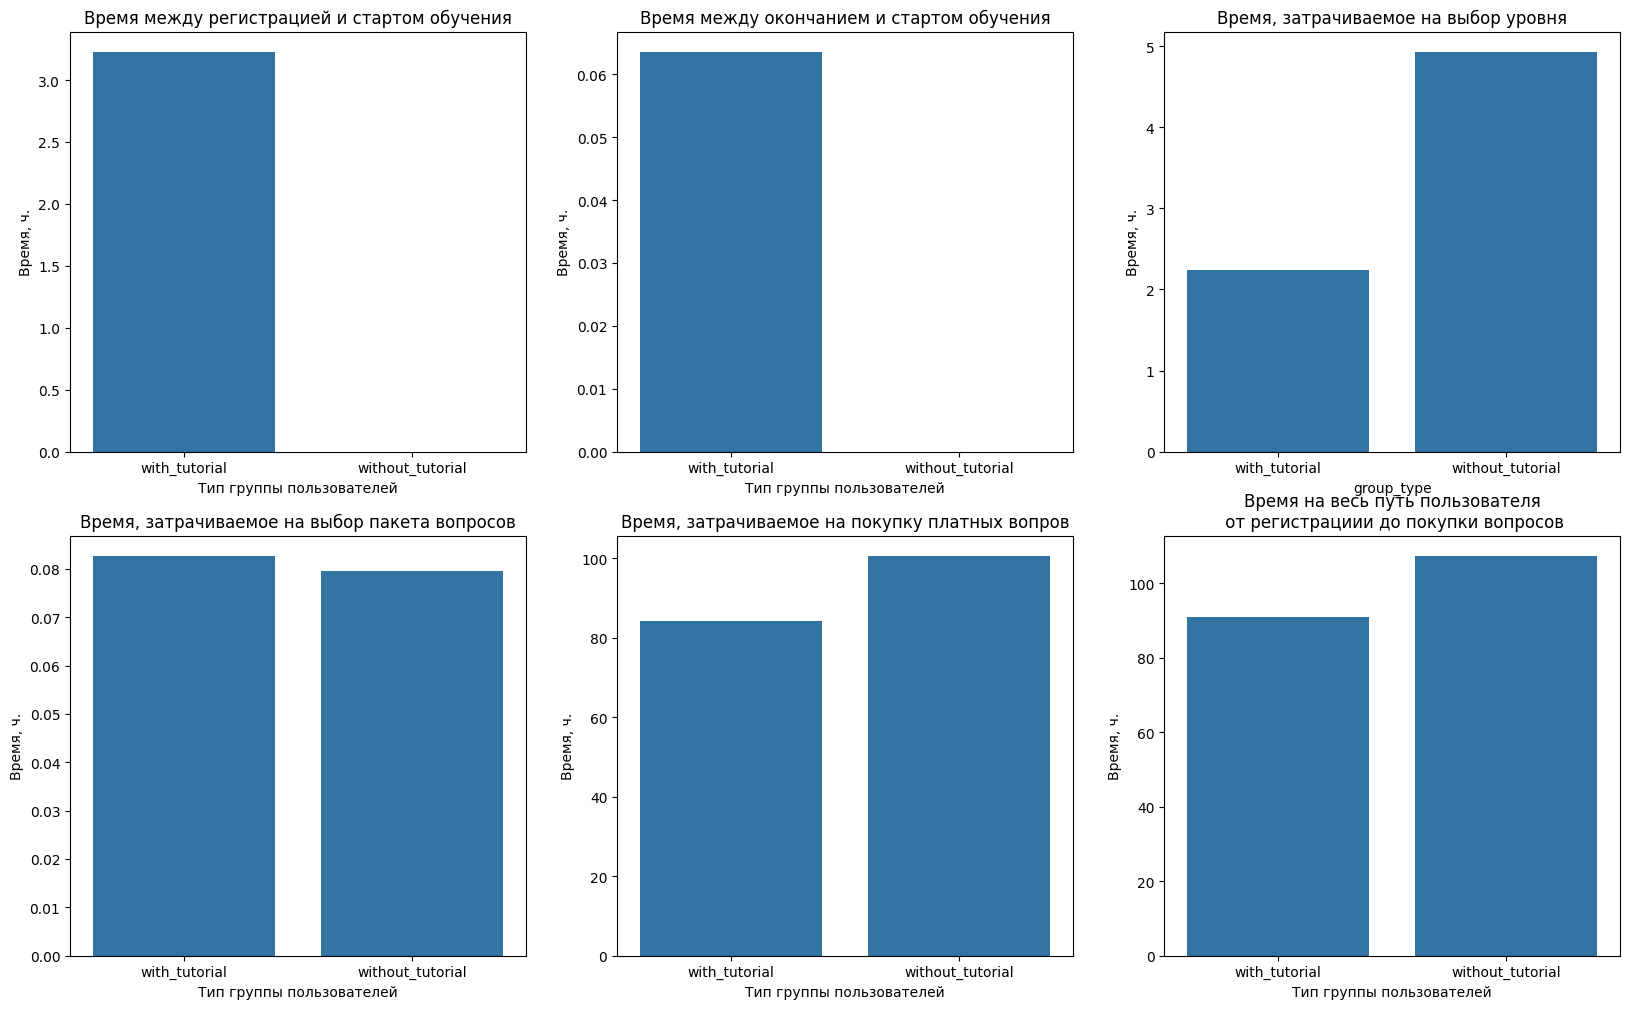

In [55]:
fig, axes = plt.subplots( nrows=2, ncols=3, figsize=(20, 12))
# выводим длительность времени затраченного пользователем от регистрации до старта обучения
sns.barplot(
    data=group_pivot_df,
    y='td_tut_start',
    x='group_type',
    ax=axes[0, 0]   
); 
axes[0, 0].set_title('Время между регистрацией и стартом обучения', fontsize=12);
axes[0, 0].set_ylabel('Время, ч.');
axes[0, 0].set_xlabel('Тип группы пользователей');

# выводим длительность времени затраченного пользователем на обучение
sns.barplot(
    data=group_pivot_df,
    y='td_tut_finish',
    x='group_type',
    ax=axes[0, 1]
); 
axes[0, 1].set_title('Время между окончанием и стартом обучения', fontsize=12);
axes[0, 1].set_ylabel('Время, ч.');
axes[0, 1].set_xlabel('Тип группы пользователей')

# выводим длительность времени затраченного пользователем после завершения обучения до выбора уровня сложности
sns.barplot(
    data=group_pivot_df,
    y='td_level_choice',
    x='group_type',
    ax=axes[0, 2]
);
axes[0, 2].set_title('Время, затрачиваемое на выбор уровня', fontsize=12);
axes[0, 2].set_ylabel('Время, ч.');

# выводим длительность времени затраченного пользователем на выбор пакета с вопросами
sns.barplot(
    data=group_pivot_df,
    y=group_pivot_df.td_pack_choice,
    x='group_type',
    ax=axes[1, 0]
); 
axes[1, 0].set_title('Время, затрачиваемое на выбор пакета вопросов', fontsize=12);
axes[1, 0].set_ylabel('Время, ч.');
axes[1, 0].set_xlabel('Тип группы пользователей')

# выводим длительность времени затраченного пользователем на приобретение платного пакета с вопросами
sns.barplot(
    data=group_pivot_df,
    y=group_pivot_df.td_purchase,
    x='group_type',
    ax=axes[1, 1]
);
axes[1, 1].set_title('Время, затрачиваемое на покупку платных вопров', fontsize=12);
axes[1, 1].set_ylabel('Время, ч.');
axes[1, 1].set_xlabel('Тип группы пользователей')

# выводим длительность прохождения всех этапов игры от регистрации пользователя до приобретения платного пакета вопросов
sns.barplot(
    data=group_pivot_df,
    y=group_pivot_df.td_allway,
    x='group_type',
    ax=axes[1, 2]
);
axes[1, 2].set_title('Время на весь путь пользователя\n от регистрациии до покупки вопросов', fontsize=12);
axes[1, 2].set_ylabel('Время, ч.');
axes[1, 2].set_xlabel('Тип группы пользователей');

ВЫВОД ПО ГИПОТЕЗЕ №1:


Пользователи, которые хотя бы раз проши обучение, проходят основные этапы игры быстрее. 
Путь от регистрации до покупки у пользователей прошедших обучение занимает 91 час. Пользователи отказавшиеся от обучения проходят все этапы игры за 107 часов.
Наибольшее разницу во времени у групп наблюдается на этапах выбора уровня сложности и покупки платных вопросов - 2,7 и 16,3 часа соответсвенно.
При этом конверсия пользователей прошедших обучение значительно превосходит конверсию пользователей отказавшихся от обучения.


ЗАДАЧА 2.Доказать, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.

In [56]:
# создадим список пользователей совершивших покупку
set_users_with_purchase = set(
    total_event_df[total_event_df.event_type == 'purchase']['user_id'].unique()
)
print(len(set_users_with_purchase))

1600


In [57]:
# Создадим DF с количеством прохождений обучения пользователями 
tutorial_attempts_df = total_event_df.groupby('user_id')['tutorial_id'].nunique().reset_index()
tutorial_attempts_df = tutorial_attempts_df.rename(columns={'tutorial_id':'tutorial_attempts'})
tutorial_attempts_df.head()

,user_id,tutorial_attempts
0,27832,0
1,27833,1
2,27834,1
3,27835,1
4,27836,2


In [58]:
# добавим столбец purchase если пользователь купил платный пакет 1 и 0 если нет 
tutorial_attempts_df['purchase'] = tutorial_attempts_df.apply(
    lambda x: 1 if x['user_id'] in set_users_with_purchase else 0, axis=1
)
tutorial_attempts_df.head()

,user_id,tutorial_attempts,purchase
0,27832,0,0
1,27833,1,0
2,27834,1,0
3,27835,1,0
4,27836,2,0


In [59]:
# создаем дата DF, в котором сгрупирруем пользователей по количеству пройденных обучений
count_tut_df = tutorial_attempts_df.groupby('tutorial_attempts')['purchase'].sum().reset_index()

# Добавим колонку с указанием процента пользователей купивших платный пакет вопросов
count_tut_df['percent'] = count_tut_df.apply(
    lambda x: x['purchase'] / len(set_users_with_purchase) * 100, axis=1
)
round(count_tut_df.sort_values('percent', ascending=False), 2)


,tutorial_attempts,purchase,percent
1,1,1207,75.44
2,2,218,13.63
3,3,51,3.19
4,4,30,1.88
0,0,22,1.38
9,9,17,1.06
5,5,16,1.00
6,6,14,0.88
8,8,13,0.81
7,7,12,0.75


tutorial attempts - попытки обучение 

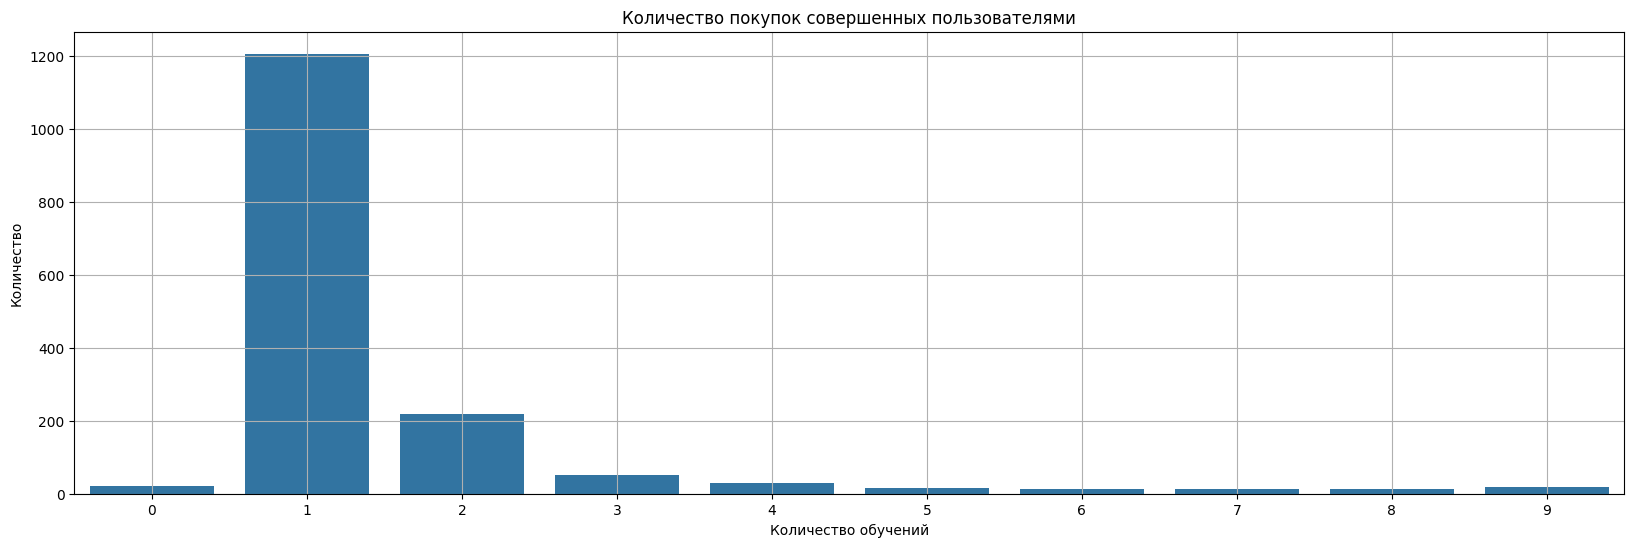

In [60]:
fig = plt.subplots(figsize=(20, 6))
barplot = sns.barplot(
    data=count_tut_df,
    x='tutorial_attempts',
    y='purchase'
);
barplot.set_title('Количество покупок совершенных пользователями', fontsize=12);
barplot.set_ylabel('Количество');
barplot.set_xlabel('Количество обучений');
barplot.grid();


In [61]:
# построения круговой диаграммы переименуем значения 'tutorial_attempts'
count_tut_df.loc[count_tut_df['purchase'] == 22,'tutorial_attempts'] = '0 tutorial'
count_tut_df.loc[count_tut_df['purchase'] == 1207,'tutorial_attempts'] = '1  tutorial'
count_tut_df.loc[count_tut_df['purchase'] == 218,'tutorial_attempts'] = '2  tutorials'
count_tut_df.loc[count_tut_df['purchase'] == 51,'tutorial_attempts'] = '3  tutorials'
count_tut_df.loc[count_tut_df['purchase'] == 30,'tutorial_attempts'] = '4  tutorials'
count_tut_df.loc[count_tut_df['purchase'] < 20,'tutorial_attempts'] = 'from 5 to 9 tutorials'
count_tut_df

C:\Users\achuk\AppData\Local\Temp\ipykernel_14932\1566548113.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0 tutorial' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  count_tut_df.loc[count_tut_df['purchase'] == 22,'tutorial_attempts'] = '0 tutorial'


,tutorial_attempts,purchase,percent
0,0 tutorial,22,1.3750
1,1 tutorial,1207,75.4375
2,2 tutorials,218,13.6250
3,3 tutorials,51,3.1875
4,4 tutorials,30,1.8750
5,from 5 to 9 tutorials,16,1.0000
6,from 5 to 9 tutorials,14,0.8750
7,from 5 to 9 tutorials,12,0.7500
8,from 5 to 9 tutorials,13,0.8125
9,from 5 to 9 tutorials,17,1.0625


In [62]:
# сгрупируем DF  по столбцу 'tutorial_attempts'
count_tut_df = count_tut_df.groupby('tutorial_attempts')[['purchase', 'percent']].sum().reset_index()

count_tut_df

,tutorial_attempts,purchase,percent
0,0 tutorial,22,1.3750
1,1 tutorial,1207,75.4375
2,2 tutorials,218,13.6250
3,3 tutorials,51,3.1875
4,4 tutorials,30,1.8750
5,from 5 to 9 tutorials,72,4.5000


In [63]:
repeated_tutorial = count_tut_df[count_tut_df.index > 1]['purchase'].sum()
repeated_tutorial_per = count_tut_df[count_tut_df.index > 1]['purchase'].sum() / count_tut_df['purchase'].sum()
print('Всего из 1600 пользователей соверших покупки в 2018 году {} прошли повторное обучение. \nЧто составляет {:.2%} от общего количества пользователей купивших платные вопросы.'.format(repeated_tutorial, repeated_tutorial_per))

Всего из 1600 пользователей соверших покупки в 2018 году 371 прошли повторное обучение. 
Что составляет 23.19% от общего количества пользователей купивших платные вопросы.


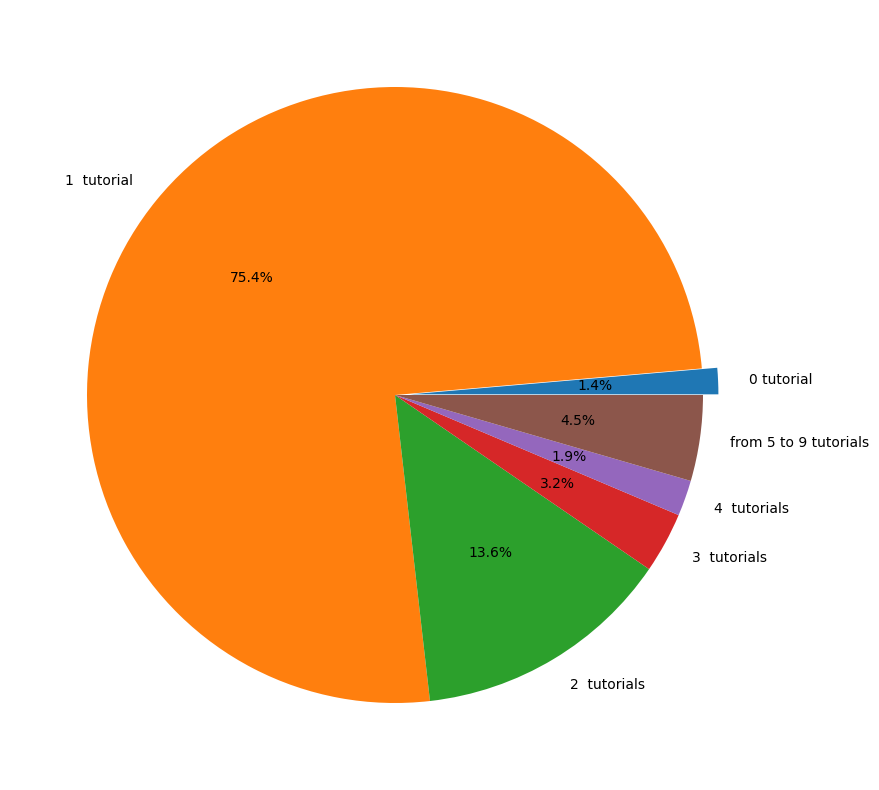

In [64]:
# Построим круговую диаграмму покупок после прохождения обучения
fig = plt.figure(figsize=(10, 10))
plt.pie(
    count_tut_df['purchase'], labels=count_tut_df['tutorial_attempts'], autopct='%.1f%%', explode = [0.05, 0, 0, 0, 0, 0]
);

ВЫВОД ПО ГИПОТЕЗЕ №2: 

Всего в 2018 году было купленно 1600 пакетов с платными вопросами. Каждый пользователь игры совершил покупку по 1 разу. 98,6% пользователей совершилили покупку после обучения. Повторное обучение положительно влияет на покупку платного пакета вопросов. 23.19% пользователей игры приобрели платные вовпросы после повторного обучения. 

ЗАДАЧА 3. 3. Определить, насколько прозрачен процесс взаимодействия с игрой.

Для проверки данной гипотезы мы определим количество пользователей вернувшихся на этап обучения после этапа выбора уровня сложности

In [65]:
# создадим DF с пользователями прошедших событие 'level_choice'
level_choice_users_df = event_df[event_df.event_type == 'level_choice'][
    ['user_id', 'start_time']] 
# Переименуем столбец с датой старта обучения в 'level_choice_time'
level_choice_users_df = level_choice_users_df.rename(    
    columns={'start_time': 'level_choice_time'}
)   
level_choice_users_count= level_choice_users_df.user_id.count() # выводим количество пользователей
level_choice_users_nunique = level_choice_users_df.user_id.nunique()    # выводим количество уникальных пользователей
print(
"""В 2018 году событие 'level_choice' было совершено {} раз. 
Из них {} пользователей было уникальных. 
Таким образом каждый пользователь выбрал уровень сложности только 1 раз""".format(
        level_choice_users_count,level_choice_users_nunique)
)

В 2018 году событие 'level_choice' было совершено 8342 раз. 
Из них 8342 пользователей было уникальных. 
Таким образом каждый пользователь выбрал уровень сложности только 1 раз


In [66]:
# Создадим список пользователей прошедших этап выбора уровня
set_level_choice_users = set(level_choice_users_df.user_id.unique())


In [67]:
# создадим DF с пользователями начавшими прошeдших этам игры 'tutorial_start'
tutorial_start_users_df = event_df[event_df.event_type == 'tutorial_start'][
    ['user_id', 'start_time']].sort_values('start_time') 
# отбираем из DF 'tutorial_start_users_df' только тех пользователей, которыу выбрали уровень
tutorial_start_users_df = tutorial_start_users_df[
    tutorial_start_users_df.user_id.isin(set_level_choice_users)]
# Переименуем столбец с датой старта обучения в 'tutorial_start_time'
tutorial_start_users_df = tutorial_start_users_df.rename(
    columns={'start_time':'tutorial_start_time'}) 
tutorial_start_users_count = tutorial_start_users_df.user_id.count()    # выводим количество пользователей
tutorial_start_users_nunique = tutorial_start_users_df.user_id.nunique() # выводим количество уникальных пользователей
print(
"""Из {} пользователей, выбравших уровень сложности, {} прошло обучение.
Всего обучений пройдено пользователями {} раз. Что говорит о том, что пользователи возвращались к обучению после выбора уровня сложности.""".format(
    level_choice_users_count, tutorial_start_users_nunique, tutorial_start_users_count)
)

Из 8342 пользователей, выбравших уровень сложности, 8244 прошло обучение.
Всего обучений пройдено пользователями 12686 раз. Что говорит о том, что пользователи возвращались к обучению после выбора уровня сложности.


In [68]:
# Объединим DF 'tutorial_start_users_df' и 'level_choice_users_df' по признаку 'user_id'
merged_users = tutorial_start_users_df.merge(
    level_choice_users_df,
    on='user_id',
    how='left'
)
merged_users.head()

,user_id,tutorial_start_time,level_choice_time
0,27835,2018-01-01 15:00:51,2018-01-01 20:37:22
1,27839,2018-01-01 19:11:36,2018-01-01 22:37:50
2,27840,2018-01-02 02:07:07,2018-01-02 05:18:42
3,27845,2018-01-02 03:03:44,2018-01-02 06:19:18
4,27842,2018-01-02 04:55:11,2018-01-02 08:46:03


In [69]:
# добавим в объединенный DF 'merged_users' столбец 'timedelta'
# в добавленном столбце выведем разницу между временем выбора уровня сложности и стартом обучения
# значения NaT заменим на 0
merged_users['timedelta'] = (
    ( merged_users.level_choice_time - merged_users.tutorial_start_time)/pd.Timedelta('1hour')
).fillna(0) 
# добавим в объединенный DF 'merged_users' столбец 're_education'
# вслучае если значение 'timedelta' положительное добавим в столбец 're_education' 0
# вслучае если значение 'timedelta' отрицательное добавим в столбец 're_education' 1 - это значит пользователь возвращался к обучению
merged_users['re_education'] = merged_users.apply(
    lambda x: 1 if x['timedelta'] < 0 else 0, axis=1
)

merged_users.head()

,user_id,tutorial_start_time,level_choice_time,timedelta,re_education
0,27835,2018-01-01 15:00:51,2018-01-01 20:37:22,5.608611,0
1,27839,2018-01-01 19:11:36,2018-01-01 22:37:50,3.437222,0
2,27840,2018-01-02 02:07:07,2018-01-02 05:18:42,3.193056,0
3,27845,2018-01-02 03:03:44,2018-01-02 06:19:18,3.259444,0
4,27842,2018-01-02 04:55:11,2018-01-02 08:46:03,3.847778,0


In [70]:
# выведем пользователей, которые возвращались к обучению после выбора уровня сложности 
users_who_had_re_education = merged_users[merged_users.re_education == 1]['user_id'].nunique()
# выведем процент пользователей, которые возвращались к обучению после выбора уровня сложности 
percent_users_who_had_re_education = users_who_had_re_education / tutorial_start_users_nunique
print(
"""Для оценки мы пренебребрежем пользователями, которые не проходили обучение вообще, а перешли сразу к выбору уровня сложности. 
Таких пользователей 98 человек, что составляет чуть более 1% от всех рассматриваемого количества пользователей.
Из {} пользователей, выбраших уровень сложности, {} вернулось повторно к обучению.
Что составляет {:.2%} от от общего числа пользоватлей, прошедших этап выбора уровня сложности """.format(
    tutorial_start_users_nunique, users_who_had_re_education, percent_users_who_had_re_education
)
)

Для оценки мы пренебребрежем пользователями, которые не проходили обучение вообще, а перешли сразу к выбору уровня сложности. 
Таких пользователей 98 человек, что составляет чуть более 1% от всех рассматриваемого количества пользователей.
Из 8244 пользователей, выбраших уровень сложности, 1386 вернулось повторно к обучению.
Что составляет 16.81% от от общего числа пользоватлей, прошедших этап выбора уровня сложности 


ВЫВОД ПО ЗАДАЧЕ №3

Всего в 2018 году 8342 пользователей прошли этап выбора уровня сложности. 98 человек не стали проходить обучение. 8244 перед этапом 'level_choice' прошли обучение. Группа прошедшая обучению и подлежит анализу. Из 8244 пользователей 1386 вернулось повторно к обучению. Что составляет 16.81% от от общего числа пользоватлей. Не смотря на то, что большинство пользователей не возвращаются к повторному обучению, процент пользователей вернувшихся достаточно высок. Необходима дополнительная проработка этапа обучения

ОБЩИЕ ВЫВОДЫ ПО ПРОЕКТУ:

1. Несторя на то, медианное значение времени затраченного на обучение состаляет 3.3 часа от момента регистрации пользователя. Общие временные затрататы на прохождение всех этапов игры от регистрации до покупки у пользователей прошедших обучение меньше (91.1 часа против 107.5 часа пользователей, отказавшихся от обучения).
2. Прохождение пользователем положительно вляет на покупку в целом. 75.4% пользователй преобретают платные пакеты вопросов разового прохождения обучения, 23.2% пользователей возвращались к обуению повторно, 1.4% покупателей отказались от  обучения. Всего пользователи проходили обучение от 1 до 9 раз в период с 2018-01-01 по 2018-01-31. Прохождение обучения положительно влияет на покупку вопросов 98.6% перед покупкой проходили обучение. 
3. Всего в 2018 году 8342 пользователей прошли этап выбора уровня сложности. 98 человек не стали проходить обучение. 8244 перед этапом 'level_choice' прошли обучение. Группа прошедшая обучению и подлежит анализу. Из 8244 пользователей 1386 вернулось повторно к обучению. Что составляет 16.81% от от общего числа пользоватлей. Не смотря на то, что большинство пользователей не возвращаются к повторному обучению, процент пользователей вернувшихся достаточно высок. Необходима дополнительная проработка этапа обучения